In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical 

In [ ]:
from google.colab import files
uploaded = files.upload()  #this is train set


Saving train.csv to train (1).csv


In [ ]:
uploaded2 = files.upload()
#im assuming we are uploading the file here

Saving test.csv to test.csv


In [ ]:
#now we need to load data from the file we extract 
import io
test_set = pd.read_csv(io.BytesIO(uploaded2['test.csv']))
train_set = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
print(test_set.shape)    #784 pixels in total (28x28), 28000 pictures to test
print(train_set.shape)   #784 pixels in total (28x28), 42000 pictures to train

(28000, 784)
(42000, 785)


In [ ]:
train_set.head() #print the first 5 values
#test_set.head()
#test_set.head()  #so test_set doesn't actually has the label tag, so we dont have to pop that

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Preprocessing Data


In [ ]:
#we now have the data. Now need to seprate the labels value and useable data
data_train = train_set.drop('label',axis = 1)  #this is the actual output from the pixel. from axis 1
data_train_label = train_set.label

print(data_train_label) #label is between 0-9, and there is 42000 data in train


0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [ ]:
data_train = data_train / 255.0
test_set = test_set/255.0
#put it between 0 and 1

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data_train, data_train_label)

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_valid = X_valid.values.reshape(-1,28,28,1)

In [ ]:
print("x_train shape: ",X_train.shape)
print("x_valid shape: ",X_valid.shape)
print("y_train shape: ",y_train.shape)
print("y_valid shape: ",y_valid.shape)

x_train shape:  (31500, 28, 28, 1)
x_valid shape:  (10500, 28, 28, 1)
y_train shape:  (31500,)
y_valid shape:  (10500,)


In [ ]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [ ]:
y_train.shape

(31500, 10, 2)

Train images:-


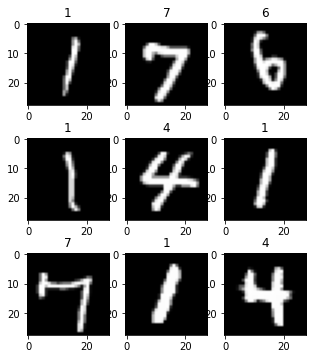

In [ ]:
print("Train images:-")
fig = plt.figure(figsize = (5, 6))
for i in range(9):
    # define subplot
    plt.subplot(3,3,1 + i)
    plt.title(np.argmax(y_train[i]))
    plt.imshow(X_train[i,:,:,0], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    #take in 28x28 pixels. and flatten them out
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    #dense layer: when all input is connected to all the next nodes
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(data_train, data_train_label, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0147 - accuracy: 0.9954
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0102 - accuracy: 0.9972
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0103 - accuracy: 0.9974
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0102 - accuracy: 0.9970
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0064 - accuracy: 0.9982
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0068 - accuracy: 0.9983
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0077 - accuracy: 0.9975
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0048 - accuracy: 0.9988
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0049 - accuracy: 0.9985
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.004

In [ ]:
#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) #what is my equivalence test image
#okie, soooooo.We dont actually get to use the test image value. This is because what they use to test
#print('Test accuracy:', test_acc)

In [ ]:
predictions = model.predict(X_valid)
#print(predictions[0])
#print(np.argmax(predictions[0]))
for i in range(9):
  print(np.argmax(predictions[i]))

6
5
8
2
5
3
4
4
5


Test images:-


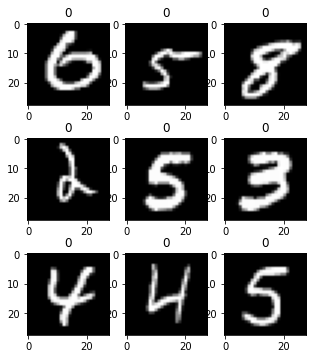

In [ ]:
print("Test images:-")
fig = plt.figure(figsize = (5, 6))
for i in range(9):
    # define subplot
    plt.subplot(3,3,1 + i)
    plt.title(np.argmax(y_valid[i]))
    plt.imshow(X_valid[i,:,:,0], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
his=model.history.history

Holy shit it fucking work 

In [ ]:
#test the accuracy of the model
test_loss, test_acc = model.evaluate(X_valid,  y_valid) 

print('Test accuracy:', test_acc)

InvalidArgumentError: ignored